# Data Understanding & Preparation 

In this project we will work with and analyze three different datasets: 
- the first dataset, called _Incidents.csv_ , contains information regarding accidents caused by guns in the United States. There are 28 columns in the dataset, which will be described in detail in the report.
- the second dataset, called _PovertyByStateYear.csv_ contains information about the percentage of poverty in each U.S. state in relation to the current year of the data. The dataset contains the following three columns: state, year, povertyPercentage.
- The third and final dataset, called _YearStateDistrictHouse.csv_ , contains information about the winner of the
congressional elections in the USA, for each year, state and congressional district. In total, the dataset contains 6 columns, with the following information: year, state, congressionalDistrict, party, candidateVotes, totalVotes.

The central component of the data science toolkit is **Pandas library**, and it is used in conjunction with other libraries in that collection. Pandas is built on top of the **NumPy package**, meaning a lot of the structure of NumPy is used or replicated in Pandas. Data in pandas is often used to feed statistical analysis in **SciPy**, plotting functions from **Matplotlib**, and machine learning algorithms in Scikit-learn.

In [58]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from collections import defaultdict
from scipy.stats import pearsonr

## Loading the data set

In these lines we read the .csv files that contain the data. This data will be assigned to Pandas dataframe. After that we give some prints to give us a first visual idea of how the data is represented. 

In [112]:
incidents = pd.read_csv('Data/incidents.csv')
poverty = pd.read_csv('Data/povertyByStateYear.csv') 
district=pd.read_csv('Data/year_state_district_house.csv')

#To display all columns
pd.options.display.max_columns = None

/var/folders/d9/v13wwg9j4639cjvzqgvrv89r0000gn/T/ipykernel_45819/849739736.py:1: DtypeWarning:

Columns (15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.



In [113]:
print("Incidents dataset:")
incidents.head() #print the first 5 rows of incidents dataset

Incidents dataset:


,date,state,city_or_county,address,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,participant_age_group1,participant_gender1,min_age_participants,avg_age_participants,max_age_participants,n_participants_child,n_participants_teen,n_participants_adult,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,notes,incident_characteristics1,incident_characteristics2
0,2015-05-02,Indiana,Indianapolis,Lafayette Road and Pike Plaza,39.8322,-86.2492,7.0,94.0,33.0,19.0,Adult 18+,Male,19.0,19.0,19.0,0.0,0.0,1.0,1.0,0.0,0,1,0.0,0.0,1.0,Teen wounded while walking - Security guard at...,Shot - Wounded/Injured,NaN
1,2017-04-03,Pennsylvania,Kane,5647 US 6,41.6645,-78.7856,5.0,NaN,NaN,62.0,Adult 18+,Male,62.0,62.0,62.0,0.0,0.0,1.0,1.0,0.0,1,0,0.0,0.0,1.0,shot self after accident,"Shot - Dead (murder, accidental, suicide)",Suicide^
2,2016-11-05,Michigan,Detroit,6200 Block of East McNichols Road,42.4190,-83.0393,14.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0.0,1.0,2.0,1 inj.,Shot - Wounded/Injured,NaN
3,2016-10-15,District of Columbia,Washington,"1000 block of Bladensburg Road, NE",38.9030,-76.9820,1.0,NaN,NaN,NaN,Adult 18+,Male,248339,707477,761203,0.0,0.0,1.0,1.0,0.0,0,1,0.0,0.0,2.0,NaN,Shot - Wounded/Injured,NaN
4,2030-06-14,Pennsylvania,Pittsburgh,California and Marshall Avenues,40.4621,-80.0308,14.0,NaN,NaN,NaN,Adult 18+,Male,NaN,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0,1,0.0,1.0,2.0,NaN,Shot - Wounded/Injured,"Drive-by (car to street, car to car)"


In [114]:
print("Poverty by state dataset:")
poverty

Poverty by state dataset:


,state,year,povertyPercentage
0,United States,2020,11.5
1,Alabama,2020,14.8
2,Alaska,2020,11.5
3,Arizona,2020,12.1
4,Arkansas,2020,15.8
...,...,...,...
879,Virginia,2004,9.1
880,Washington,2004,9.8
881,West Virginia,2004,15.0
882,Wisconsin,2004,10.9


In [115]:
print("Year state district house dataset:")
district.tail() #print the last 5 rows of year_state_district_house dataset

Year state district house dataset:


,year,state,congressional_district,party,candidatevotes,totalvotes
10436,2022,WISCONSIN,5,REPUBLICAN,243741,378523
10437,2022,WISCONSIN,6,REPUBLICAN,239231,251999
10438,2022,WISCONSIN,7,REPUBLICAN,209224,338268
10439,2022,WISCONSIN,8,REPUBLICAN,223981,310196
10440,2022,WYOMING,0,REPUBLICAN,132206,198198


At this point we can print the column labels of each datasets.

In [116]:
print(incidents.columns)
print()
print(poverty.columns)
print()
print(district.columns)

Index(['date', 'state', 'city_or_county', 'address', 'latitude', 'longitude',
       'congressional_district', 'state_house_district',
       'state_senate_district', 'participant_age1', 'participant_age_group1',
       'participant_gender1', 'min_age_participants', 'avg_age_participants',
       'max_age_participants', 'n_participants_child', 'n_participants_teen',
       'n_participants_adult', 'n_males', 'n_females', 'n_killed', 'n_injured',
       'n_arrested', 'n_unharmed', 'n_participants', 'notes',
       'incident_characteristics1', 'incident_characteristics2'],
      dtype='object')

Index(['state', 'year', 'povertyPercentage'], dtype='object')

Index(['year', 'state', 'congressional_district', 'party', 'candidatevotes',
       'totalvotes'],
      dtype='object')


## Types of Attributes and basic checks

In this section we check the integrity of the data, that is, whether there are empty cells or corrupted data. 
For this purpose we will use the Pandas function **info()**, which checks if there are null values in any column. This function also checks the data type for each column, as well as the number of data types and the number of columns and rows.

In [117]:
incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date                       239677 non-null  object 
 1   state                      239677 non-null  object 
 2   city_or_county             239677 non-null  object 
 3   address                    223180 non-null  object 
 4   latitude                   231754 non-null  float64
 5   longitude                  231754 non-null  float64
 6   congressional_district     227733 non-null  float64
 7   state_house_district       200905 non-null  float64
 8   state_senate_district      207342 non-null  float64
 9   participant_age1           147379 non-null  float64
 10  participant_age_group1     197558 non-null  object 
 11  participant_gender1        203315 non-null  object 
 12  min_age_participants       164879 non-null  object 
 13  avg_age_participants       16

In [118]:
poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              884 non-null    object 
 1   year               884 non-null    int64  
 2   povertyPercentage  832 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 20.8+ KB


In [119]:
district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10441 entries, 0 to 10440
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   year                    10441 non-null  int64 
 1   state                   10441 non-null  object
 2   congressional_district  10441 non-null  int64 
 3   party                   10441 non-null  object
 4   candidatevotes          10441 non-null  int64 
 5   totalvotes              10441 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 489.6+ KB



Instead, in these rows we print the data types in each column of the three data sets.

In [120]:
print("Print the data types of each column of Incidents dataset:")
incidents.dtypes

Print the data types of each column of Incidents dataset:


date                          object
state                         object
city_or_county                object
address                       object
latitude                     float64
longitude                    float64
congressional_district       float64
state_house_district         float64
state_senate_district        float64
participant_age1             float64
participant_age_group1        object
participant_gender1           object
min_age_participants          object
avg_age_participants          object
max_age_participants          object
n_participants_child          object
n_participants_teen           object
n_participants_adult          object
n_males                      float64
n_females                    float64
n_killed                       int64
n_injured                      int64
n_arrested                   float64
n_unharmed                   float64
n_participants               float64
notes                         object
incident_characteristics1     object
i

In [121]:
print("Print the data types of each column of PovertyByStateYear dataset:")
poverty.dtypes

Print the data types of each column of PovertyByStateYear dataset:


state                 object
year                   int64
povertyPercentage    float64
dtype: object

In [122]:
print("Print the data types of each column of YearStateDisctrictHouse dataset:")
district.dtypes

Print the data types of each column of YearStateDisctrictHouse dataset:


year                       int64
state                     object
congressional_district     int64
party                     object
candidatevotes             int64
totalvotes                 int64
dtype: object

In the next few lines we create a vector containing the count of null values for each column in our datasets, using the **isnull()** method in combination with the **sum()** method found in the Pandas library.

In [123]:
incidents_null=incidents.isnull().sum()
print(incidents_null)

date                             0
state                            0
city_or_county                   0
address                      16497
latitude                      7923
longitude                     7923
congressional_district       11944
state_house_district         38772
state_senate_district        32335
participant_age1             92298
participant_age_group1       42119
participant_gender1          36362
min_age_participants         74798
avg_age_participants         74620
max_age_participants         74708
n_participants_child         42104
n_participants_teen          42099
n_participants_adult         42102
n_males                      36362
n_females                    36362
n_killed                         0
n_injured                        0
n_arrested                   27626
n_unharmed                   27626
n_participants                   0
notes                        81017
incident_characteristics1      326
incident_characteristics2    97746
dtype: int64


In [124]:
poverty_null=poverty.isnull().sum()
print(poverty_null)

state                 0
year                  0
povertyPercentage    52
dtype: int64


At this point we move on to update the **poverty** DataFrame by removing the 52 rows containing null values in the column index corresponding to the **PovertyPercentage**. In fact, these rows turn out to be useless for the purpose of data analysis, since they only report state and year values. We therefore obtain a new table with no null values, as can be seen from the second check.

In [125]:
poverty=poverty.dropna()
poverty_null=poverty.isnull().sum()
print(poverty_null)

state                0
year                 0
povertyPercentage    0
dtype: int64


In [126]:
district_null=district.isnull().sum()
print(district_null)

year                      0
state                     0
congressional_district    0
party                     0
candidatevotes            0
totalvotes                0
dtype: int64


## Eliminate duplicates.

In the next lines of code we will count for each dataset how many duplicates there are: that is, how many rows are the same as other rows already in the dataset. After this we will move on to modify the tables in each dataset by eliminating the duplicate rows (we keep the first instance of each row). In this way we get tables of smaller size in which each data item appears only once.

In [127]:
incidents_duplicated_rows=incidents.duplicated()
print("The total number of duplicate rows in the Incidents dataset is", incidents_duplicated_rows.sum())
# incidents[incidents_duplicated_rows]
incidents=incidents.drop_duplicates()


The total number of duplicate rows in the Incidents dataset is 253


We can then see that the number of duplicate rows in the Incidents dataset was 253. Of these rows we removed the duplicates using the pandas **drop_duplicates()** command. In the other two datesets, however, there were no duplicate rows, as we can see below.

In [128]:
print("The total number of duplicate rows in the Poverty By State Year dataset is", poverty.duplicated().sum())
print("The total number of duplicate rows in the Year State Disctrict House dataset is", district.duplicated().sum())


The total number of duplicate rows in the Poverty By State Year dataset is 0
The total number of duplicate rows in the Year State Disctrict House dataset is 0


## Join the dataset

After studying the general characteristics of the three datasets, we can move on to join them, using the column indices in common, to obtain one large table containing all the information from the three datasets, which we call **join_dataset**.

In [129]:
# Add and reorder year column to join poverty table
columns = incidents.columns
incidents['year'] = pd.to_datetime(incidents['date']).dt.year
incidents = incidents[columns.insert(columns.get_loc('date') + 1, 'year')]
join_1 = pd.merge(incidents, poverty, on=['year','state'], how='left')

#join_1.head()

# Workaround to join district table
temp = join_1['state']
join_1['state'] = join_1['state'].str.upper()
join_dataset = pd.merge(join_1, district, on=['year','state','congressional_district'], how='left')
join_dataset['state'] = temp

join_dataset.head()

,date,year,state,city_or_county,address,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,participant_age_group1,participant_gender1,min_age_participants,avg_age_participants,max_age_participants,n_participants_child,n_participants_teen,n_participants_adult,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,notes,incident_characteristics1,incident_characteristics2,povertyPercentage,party,candidatevotes,totalvotes
0,2015-05-02,2015,Indiana,Indianapolis,Lafayette Road and Pike Plaza,39.8322,-86.2492,7.0,94.0,33.0,19.0,Adult 18+,Male,19.0,19.0,19.0,0.0,0.0,1.0,1.0,0.0,0,1,0.0,0.0,1.0,Teen wounded while walking - Security guard at...,Shot - Wounded/Injured,NaN,12.3,NaN,NaN,NaN
1,2017-04-03,2017,Pennsylvania,Kane,5647 US 6,41.6645,-78.7856,5.0,NaN,NaN,62.0,Adult 18+,Male,62.0,62.0,62.0,0.0,0.0,1.0,1.0,0.0,1,0,0.0,0.0,1.0,shot self after accident,"Shot - Dead (murder, accidental, suicide)",Suicide^,10.5,NaN,NaN,NaN
2,2016-11-05,2016,Michigan,Detroit,6200 Block of East McNichols Road,42.4190,-83.0393,14.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0.0,1.0,2.0,1 inj.,Shot - Wounded/Injured,NaN,11.0,DEMOCRAT,244135.0,310974.0
3,2016-10-15,2016,District of Columbia,Washington,"1000 block of Bladensburg Road, NE",38.9030,-76.9820,1.0,NaN,NaN,NaN,Adult 18+,Male,248339,707477,761203,0.0,0.0,1.0,1.0,0.0,0,1,0.0,0.0,2.0,NaN,Shot - Wounded/Injured,NaN,14.9,NaN,NaN,NaN
4,2030-06-14,2030,Pennsylvania,Pittsburgh,California and Marshall Avenues,40.4621,-80.0308,14.0,NaN,NaN,NaN,Adult 18+,Male,NaN,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0,1,0.0,1.0,2.0,NaN,Shot - Wounded/Injured,"Drive-by (car to street, car to car)",NaN,NaN,NaN,NaN


# Plots

In [77]:
join_dataset.corr(numeric_only=True)

,year,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,povertyPercentage,candidatevotes,totalvotes
year,1.000000,-0.061706,0.006717,0.027740,0.023398,0.003686,0.005517,-0.031930,-0.033802,-0.084535,0.028366,-0.108754,0.122777,0.036712,-0.275412,0.479024,0.506567
latitude,-0.061706,1.000000,-0.056551,-0.259010,-0.237557,0.028585,-0.027926,-0.038245,-0.037406,-0.080343,-0.011661,0.026213,-0.045867,-0.063502,-0.582905,0.186589,0.200006
longitude,0.006717,-0.056551,1.000000,-0.215554,0.236551,0.113332,-0.051459,0.003754,-0.016593,-0.062280,0.036830,-0.021465,0.012854,-0.009142,-0.045517,0.134122,0.129912
congressional_district,0.027740,-0.259010,-0.215554,1.000000,0.228384,0.309651,0.012924,0.008071,-0.003562,0.055800,-0.007351,-0.003881,-0.008953,0.014076,0.018480,-0.239212,-0.225599
state_house_district,0.023398,-0.237557,0.236551,0.228384,1.000000,0.431757,0.008285,0.021889,0.014207,-0.005925,-0.030253,0.022811,0.040394,0.018084,0.150732,-0.139825,-0.082375
state_senate_district,0.003686,0.028585,0.113332,0.309651,0.431757,1.000000,0.010149,-0.005434,-0.004843,-0.010523,-0.044165,0.042447,-0.008648,-0.017726,-0.012617,-0.102043,-0.016821
participant_age1,0.005517,-0.027926,-0.051459,0.012924,0.008285,0.010149,1.000000,-0.059847,0.067435,0.140161,-0.119299,-0.026186,-0.008706,-0.033667,0.031738,-0.017160,0.013063
n_males,-0.031930,-0.038245,0.003754,0.008071,0.021889,-0.005434,-0.059847,1.000000,-0.061524,0.133411,0.245733,0.373356,0.423119,0.823160,0.055823,-0.055022,-0.061310
n_females,-0.033802,-0.037406,-0.016593,-0.003562,0.014207,-0.004843,0.067435,-0.061524,1.000000,0.179309,0.153622,0.119352,0.128422,0.369820,0.055141,-0.036277,-0.032581
n_killed,-0.084535,-0.080343,-0.062280,0.055800,-0.005925,-0.010523,0.140161,0.133411,0.179309,1.000000,-0.125801,-0.050003,-0.154084,0.237962,0.067678,-0.063299,-0.082648


In [48]:
print(join_dataset.n_males.value_counts())

n_males
1.0     117411
2.0      52200
3.0      15901
0.0       9180
4.0       5719
5.0       1877
6.0        613
7.0        192
8.0         84
9.0         32
10.0        25
11.0        16
13.0        12
12.0         7
16.0         7
14.0         7
15.0         4
18.0         3
21.0         2
26.0         2
29.0         1
20.0         1
17.0         1
19.0         1
60.0         1
27.0         1
61.0         1
Name: count, dtype: int64


In [47]:
print(join_dataset.n_females.value_counts())

n_females
0.0     165609
1.0      33295
2.0       3641
3.0        579
4.0        119
5.0         31
6.0         15
8.0          3
7.0          3
13.0         1
11.0         1
18.0         1
10.0         1
23.0         1
17.0         1
Name: count, dtype: int64


In [46]:
print(join_dataset.n_participants.value_counts())

n_participants
1.0      104833
2.0       70649
0.0       24630
3.0       23489
4.0        9484
5.0        3726
6.0        1418
7.0         570
8.0         280
9.0         114
10.0         76
11.0         36
12.0         27
13.0         15
15.0         14
17.0          8
14.0          8
20.0          6
16.0          5
19.0          5
18.0          4
24.0          4
21.0          3
22.0          3
35.0          2
29.0          2
27.0          2
26.0          2
47.0          1
63.0          1
23.0          1
30.0          1
37.0          1
52.0          1
32.0          1
28.0          1
103.0         1
Name: count, dtype: int64


In [111]:
print(join_dataset.n_females.isnull().sum())
print(join_dataset.n_males.isnull().sum())
print(join_dataset.n_participants.isnull().sum())
null_rows = join_dataset[['n_males', 'n_females']].isna()
count_null_rows = null_rows.all(axis=1).sum()
print(count_null_rows)
print(null)

36123
36123
0
36123
        n_males  n_females
0         False      False
1         False      False
2          True       True
3         False      False
4         False      False
...         ...        ...
239419    False      False
239420    False      False
239421    False      False
239422    False      False
239423    False      False

[239424 rows x 2 columns]


# Geo Data Visualization

The idea would be to represent on a map of the U.S. and in a simple graphical way which cities and states are the most dangerous. For cities, the idea would be to use a clustering algorithm, using a metric that takes into account latitude and longitude. For states, on the other hand, just merge the data for each state, counting how many instances of each state appear.

## Data creation and cleaning.

At first we need to create the subtable that we are interested in and do some preliminary cleaning. In fact, at first we can eliminate all rows that do not have latitude and longitude information, since they cannot be represented graphically. (We might actually think about doing inference to approximate the value.)

In [130]:
geo_incidents=incidents[['state', 'city_or_county', 'latitude', 'longitude']]
geo_incidents=geo_incidents.dropna(subset=['latitude'])

#check that there are no null valus in dataframe
geo_incidents.isnull().sum()

state             0
city_or_county    0
latitude          0
longitude         0
dtype: int64

Also, through a test graphical representation, we noticed how 4 data are outliers, in that their longitude and latitude that is referred to an American state actually falls on Asian soil. Again we are going to eliminate these data as they are very few compared to the total, although we could well approximate their latitude and longitude.

In [131]:
geo_incidents=geo_incidents.drop(geo_incidents[(geo_incidents['latitude'] == 37.6499) & (geo_incidents['longitude']==97.4331)].index)
geo_incidents=geo_incidents.drop(geo_incidents[(geo_incidents['latitude'] == 40.8509) & (geo_incidents['longitude']==96.7591)].index)
geo_incidents=geo_incidents.drop(geo_incidents[(geo_incidents['latitude'] == 38.7487) & (geo_incidents['longitude']==90.37)].index)
geo_incidents=geo_incidents.drop(geo_incidents[(geo_incidents['latitude'] == 35.2137) & (geo_incidents['longitude']==80.9491)].index)

## Geo Visualization by cities

We then begin by wanting to give a graphical representation of the number of accidents that occur in each city. We first create a table in which we merge all the occurrences of incidents that happen in the same city and create a new column, called **number_of_incidents**, that counts for each city how many times it was present in the original dataframe (i.e., how many crimes occurred in that city). At this point we also update the **latitude** and **longitude** columns, taking for each city as its latitude (and likewise as its longitude), the median of all the latitudes associated with that specific city in the original dataframe. We take the median and not the mean because we would like a point that geographically reflects the center of the city.

In [132]:
# Calculate the incident count for each 'state' and 'city_or_county' pair.
city_state_incidents = geo_incidents.groupby(['city_or_county', 'state'])['latitude'].count().reset_index()

# Rename the 'latitude' column to 'number_of_incidents'
city_state_incidents.rename(columns={'latitude': 'number_of_incidents'}, inplace=True)


average_location = geo_incidents.groupby(['state', 'city_or_county'])[['latitude', 'longitude']].median().reset_index()

# Merge incident count and location information.
geo_cities_incidents = pd.merge(city_state_incidents, average_location, on=['state', 'city_or_county'])
geo_cities_incidents = geo_cities_incidents.sort_values(by='number_of_incidents', ascending=False)
geo_cities_incidents


,city_or_county,state,number_of_incidents,latitude,longitude
2788,Chicago,Illinois,10416,41.83625,-87.67340
742,Baltimore,Maryland,3843,39.30270,-76.62860
16223,Washington,District of Columbia,3075,38.89350,-76.99020
10995,New Orleans,Louisiana,2940,29.96905,-90.06095
12216,Philadelphia,Pennsylvania,2857,39.99390,-75.15650
...,...,...,...,...,...
7953,Kila,Montana,1,48.10090,-114.52400
7954,Kilauea,Hawaii,1,22.21190,-159.41200
7957,Killbuck,Ohio,1,40.52500,-81.98890
7958,Killdeer,North Dakota,1,47.37450,-102.79700


At this point we use the **plotly** package to give a graphical representation of the data in the table above. Each city will be associated with a circle. This circle will be larger as the **number_of_incidents** referring to the city that the circle describes increases. Likewise, the colors of these circles will vary from yellow, to indicate cities with low numbers of crimes, to red, to indicate cities with more crimes.

In [133]:
import plotly.express as px

color_scale = [(0, 'yellow'), (1,'red')]
fig = px.scatter_mapbox(geo_cities_incidents, 
                        lat="latitude", 
                        lon="longitude", 
                        hover_data=[ "city_or_county", "state", "number_of_incidents"],
                        color="number_of_incidents",
                        color_continuous_scale=color_scale,
                        size="number_of_incidents",
                        zoom=3, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Cluster creation

We now move on to the creation of the clusters. To do this we use the **k-Means** method found in the **sklearn.cluster** library. In order to use this method first it would be useful to try to figure out what the optimal number of clusters is. The idea then to figure out what is the ideal number of clusters is to use a method, called the **Elbow Method**. This involves training the k-Means model with a range of cluster values and calculating the inertia (sum of the square distances of the instances from the cluster center) for each cluster value. Once this is done, one then looks for the point at which the inertia begins to change most slowly, creating an elbow curve. This point is considered the optimal number of clusters. In general, we will want to create a number of clusters that gives us a signficant idea of how incidents develop in the United States, so neither include too many cities, nor too few. Therefore, the range of cluster values we apply to the method is from 10 to 100.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

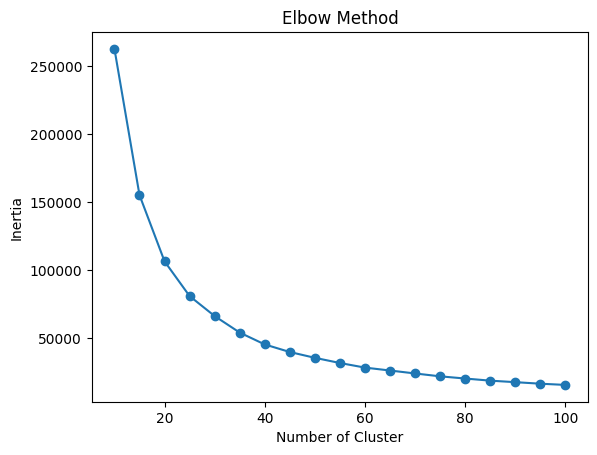

In [143]:
from sklearn.cluster import KMeans

# Select the column of latitude and longitude
coordinates = geo_cities_incidents[['latitude', 'longitude']]

inertias = []
k_values=range(10, 101, 5)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(coordinates)
    inertias.append(kmeans.inertia_)

plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia')
plt.title("Elbow Method")
plt.show()

Once we have then identified the best number of clusters, which would be 42, we can apply the k-Means method one last time and obtain a clustering of our cities. We thus add to the new tables a new column in which we add the information about what number of clusters each data item belongs to.

In [144]:
from sklearn.cluster import KMeans


#the number of cluster obtained from elbow method
num_clusters = 42  
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(coordinates)

#add cluster labels to the original DataFrame
geo_cities_incidents['cluster'] = kmeans.labels_
geo_cities_incidents


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,city_or_county,state,number_of_incidents,latitude,longitude,cluster
2788,Chicago,Illinois,10416,41.83625,-87.67340,35
742,Baltimore,Maryland,3843,39.30270,-76.62860,39
16223,Washington,District of Columbia,3075,38.89350,-76.99020,39
10995,New Orleans,Louisiana,2940,29.96905,-90.06095,19
12216,Philadelphia,Pennsylvania,2857,39.99390,-75.15650,40
...,...,...,...,...,...,...
7953,Kila,Montana,1,48.10090,-114.52400,6
7954,Kilauea,Hawaii,1,22.21190,-159.41200,7
7957,Killbuck,Ohio,1,40.52500,-81.98890,21
7958,Killdeer,North Dakota,1,47.37450,-102.79700,32


At this point we create a new dataframe from **geo_city_incidents** in which we simply group all the data belonging to the same cluster. For each cluster we set as "latitude" (and therefore as "longitude") the median of all the "latitudes" in the data that belong to the cluster. Also as "number_of_incidents" the sum of all "number_of_incidents" present in the cities that belong to the cluster.

In [145]:
# Raggruppa il DataFrame originale 'df' per il numero di cluster
grouped = geo_cities_incidents.groupby('cluster')

# Calcola la somma di "number_of_incidents" per ciascun cluster
sum_incidents = grouped['number_of_incidents'].sum()

# Calcola la mediana di latitudine e longitudine per ciascun cluster
median_latitude = grouped['latitude'].median()
median_longitude = grouped['longitude'].median()

# Crea un nuovo DataFrame con le colonne richieste
new_geo_cities_incidents = pd.DataFrame({
    'cluster': sum_incidents.index,
    'number_of_incidents': sum_incidents.values,
    'latitude': median_latitude.values,
    'longitude': median_longitude.values
})

new_geo_cities_incidents

# Ora 'new_geo_cities_incidents' contiene il nuovo DataFrame con le colonne richieste

,cluster,number_of_incidents,latitude,longitude
0,0,2335,41.699000,-92.335900
1,1,8760,38.461450,-121.766500
2,2,3610,42.658900,-77.449700
3,3,8959,34.027000,-85.037950
4,4,122,61.518800,-160.949000
5,5,5226,33.148300,-96.975850
6,6,612,46.408800,-112.133000
7,7,277,20.888250,-156.416500
8,8,3196,37.328800,-82.189250
9,9,3564,39.533400,-105.170000


Finally we can move on to printing the result obtained on the map of the United States, exactly as we had printed previously for the cities.

In [146]:
color_scale = [(0, 'yellow'), (1,'red')]
fig = px.scatter_mapbox(new_geo_cities_incidents, 
                        lat="latitude", 
                        lon="longitude", 
                        hover_data=[ "cluster", "number_of_incidents"],
                        color="number_of_incidents",
                        color_continuous_scale=color_scale,
                        size="number_of_incidents",
                        zoom=3, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## Geo Visualization by states.

Now we move to visualize the incidents refferred to states. We first check that the U.S. federal states are all present. With the pandas **unique()** command we save all the different instances of states in the Incidents dataset into a list. So, as we can see with the following prints, all 50 federal states of the U.S. are then present, to which an instance is added for the *District of Columbia*, also known as Washington D.C. (the capital city).

In [96]:
incidents_states=geo_incidents.state.unique()
incidents_states.sort()
print("The number of different states in the Incidents dataset is:", incidents_states.size)
print()
print(incidents_states)

The number of different states in the Incidents dataset is: 51

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


At this point we create a table containing only 51 rows. In fact, we will take the previously created **geo_cities_incidents** DataFrame and merge all rows that report information about crimes that occurred in the same state. We also update the **number_of_incidents** column, which counts the sum of the number of crimes that occurred in all cities for each state.

Finally, we associate these two columns with two other columns containing latitude and longitude information. With each state we associate as latitude (and equivalently longitude) the median of all latitudes in **geo_cities_incidents** that relate to the same state. We take the median and not the mean because we want to get a point that is geographically in the center of the state, thus not having to count if more crimes occur at one point in the same state than at another point.

In [97]:
state_incidents = geo_cities_incidents.groupby('state')['number_of_incidents'].sum().reset_index()
state_incidents.columns = ['state', 'number_of_incidents']
average_location_state = geo_cities_incidents.groupby('state')[['latitude', 'longitude']].median().reset_index()
geo_state_incidents=pd.merge(state_incidents, average_location_state, on='state')
geo_state_incidents


,state,number_of_incidents,latitude,longitude
0,Alabama,5372,33.201400,-86.682450
1,Alaska,1289,61.542200,-151.201000
2,Arizona,2264,33.509050,-111.815250
3,Arkansas,2754,35.259650,-92.397325
4,California,15981,36.317400,-119.779000
5,Colorado,3055,39.441325,-105.101500
6,Connecticut,2987,41.574950,-72.678150
7,Delaware,1643,39.178825,-75.575550
8,District of Columbia,3081,38.866350,-76.999650
9,Florida,14597,28.249300,-81.712400


Finally we use **plotly** in the same way we did above in the case of cities to get the following result.

In [98]:
color_scale = [(0, 'yellow'), (1,'red')]
fig = px.scatter_mapbox(geo_state_incidents, 
                        lat="latitude", 
                        lon="longitude", 
                        hover_data=[ "state", "number_of_incidents"],
                        color="number_of_incidents",
                        color_continuous_scale=color_scale,
                        size="number_of_incidents",
                        zoom=3, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()